# Biofuel Location Data Research for the US

I'll be exploring Location Data information for Biofuels in the US. This will hopefully lead to an easier way to look up this information. The current web pages or mobile apps that contain this information aren't the easiest to use. My hope is that after exploring this data I can create something that will make it easy for biofuel users to find the infromation they need.

In [1]:
#Import statements
import pandas as pd
import numpy as np
import seaborn as sb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
import gmplot

In [27]:
pylab.rcParams['figure.figsize'] = (15, 10)

In [2]:
#Allows all columns to be seen in dataframe
pd.set_option('display.max_columns', None)

In [3]:
#Import data from csv into pandas dataframe
data = pd.read_csv("04232015altfuelstations.csv")

In [4]:
data.columns

Index([u'Fuel Type Code', u'Station Name', u'Street Address',
       u'Intersection Directions', u'City', u'State', u'ZIP', u'Plus4',
       u'Station Phone', u'Status Code', u'Expected Date',
       u'Groups With Access Code', u'Access Days Time', u'Cards Accepted',
       u'BD Blends', u'NG Fill Type Code', u'NG PSI', u'EV Level1 EVSE Num',
       u'EV Level2 EVSE Num', u'EV DC Fast Count', u'EV Other Info',
       u'EV Network', u'EV Network Web', u'Geocode Status', u'Latitude',
       u'Longitude', u'Date Last Confirmed', u'ID', u'Updated At',
       u'Owner Type Code', u'Federal Agency ID', u'Federal Agency Name',
       u'Open Date', u'Hydrogen Status Link', u'NG Vehicle Class',
       u'LPG Primary', u'E85 Blender Pump', u'EV Connector Types'],
      dtype='object')

In [6]:
#Select Data for State = TN
data.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types
0,LPG,Irish Propane,70 Katherine St,At Bailey and Clinton,Buffalo,NY,14210,NaN,716-852-3335,E,NaN,Public,8am-4:45pm M-F,Cash A D M V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPS,42.859400,-78.858933,2015-04-03,13444,2015-04-03 16:57:34 UTC,P,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
1,ELEC,Latitudes,2401 Highway 528,NaN,Rio Rancho,NM,87124,NaN,505-369-7777,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,200-8,35.218430,-106.663000,2015-01-06,50083,2015-01-06 17:43:46 UTC,P,NaN,NaN,2012-08-01,NaN,NaN,NaN,NaN,J1772
2,ELEC,American Bush - Solar Canopy,2630 S 300 W,Located across from Tire World,Salt Lake City,UT,84115,NaN,801-518-3529,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,200-8,40.714420,-111.900105,2015-01-06,42013,2015-01-06 17:47:30 UTC,P,NaN,NaN,2011-12-01,NaN,NaN,NaN,NaN,J1772
3,ELEC,McDonald's #31850 - Flower Mound TX,3601 FM 407,NaN,Flower Mound,TX,75028,NaN,888-998-2546,E,NaN,Public,MON: 24 hours | TUE: 24 hours | WED: 24 hours ...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Blink Network,http://www.blinknetwork.com/,GPS,33.071809,-97.085119,2015-04-23,63495,2015-04-23 07:09:51 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J1772
4,ELEC,CITY OF SEATTLE,600 Pine St,NaN,Seattle,WA,98101,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,ChargePoint Network,http://www.mychargepoint.net/,200-8,47.612514,-122.335409,2015-04-23,43306,2015-04-23 07:54:36 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J1772


#### Plot the number of Alternative Fueling Stations per State

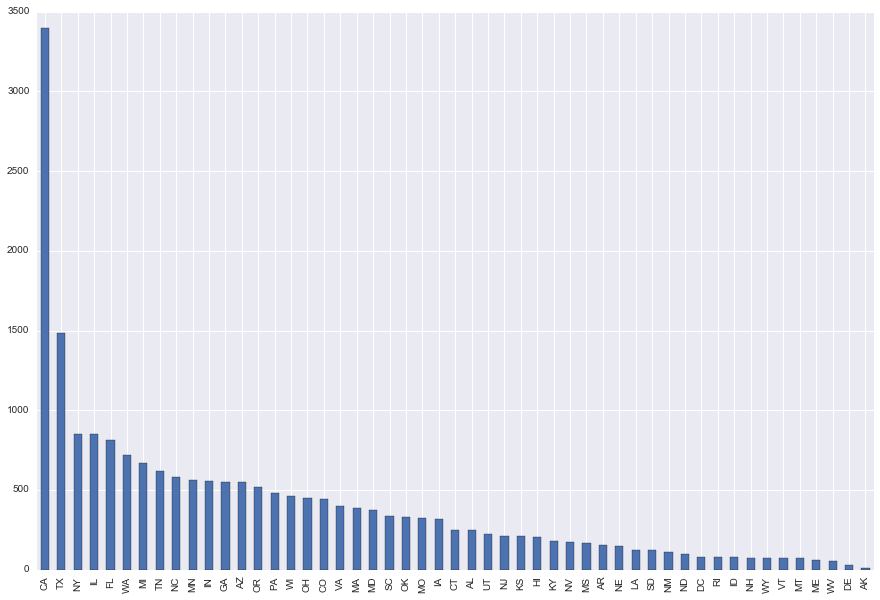

In [29]:
data['State'].value_counts().plot(kind='bar',)

## Plot Fueling Station Locations as a heatmap on Google Maps.

Convert Latitudes and Longitudes to list to use with heatmap.

In [96]:
lats = data['Latitude']

In [97]:
lats.tolist

<bound method Series.tolist of 0        42.859400
1        35.218430
2        40.714420
3        33.071809
4        47.612514
5        37.795027
6        39.952873
7        32.983800
8        47.527427
9        41.418059
10       42.672791
11       41.809601
12       37.753135
13       47.623950
14       39.982250
15       35.199728
16       41.139869
17       39.408182
18       47.590015
19       42.770945
20       47.937520
21       28.590904
22       37.506731
23       40.394483
24       35.210144
25       33.133685
26       28.235289
27       40.720647
28       41.242703
29       48.102884
           ...    
20299    34.727834
20300    28.415073
20301    39.327320
20302    44.788800
20303    35.320213
20304    38.247073
20305    37.244644
20306    44.948972
20307    33.504061
20308    27.286958
20309    40.702332
20310    38.664295
20311    33.862142
20312    42.339573
20313    34.686097
20314    33.729855
20315    40.325461
20316    32.808147
20317    42.316406
20318    29.687176


In [98]:
longs = data['Longitude']

In [99]:
longs.tolist

<bound method Series.tolist of 0        -78.858933
1       -106.663000
2       -111.900105
3        -97.085119
4       -122.335409
5       -122.398500
6        -75.152862
7        -96.845317
8       -121.823532
9        -81.802714
10       -88.255600
11       -71.408853
12      -122.404374
13      -122.337078
14       -74.808612
15       -90.007121
16      -112.063257
17       -84.506658
18      -122.228546
19       -73.753012
20       -97.014548
21       -81.366096
22       -77.479080
23      -104.736046
24       -87.054365
25      -117.332123
26       -82.181244
27       -73.304128
28       -76.998402
29      -123.342597
            ...    
20299    -76.771224
20300    -81.242279
20301   -120.215000
20302    -91.517527
20303    -78.675775
20304    -86.890074
20305   -121.789673
20306    -93.096200
20307   -117.160365
20308    -80.364542
20309   -111.923648
20310   -121.271623
20311   -117.993147
20312    -71.108666
20313    -85.676894
20314   -116.379108
20315    -74.073654
20316    

## Create Google Heat Map

Start map zoom centered on continental United States and plot all latitude and longitude values on map. Output to html file for viewing.

In [102]:
gmap = gmplot.GoogleMapPlotter(37.4419, -96.8, 5)
gmap.heatmap(lats, longs)
gmap.draw("mymap.html")